<a href="https://colab.research.google.com/github/ShyamB123/Optimised-Binary-Backoff/blob/main/O_BEB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt
import math

In [ ]:
#BEB

class Node_BEB:
    def __init__(self, node_id):
        self.node_id = node_id
        self.backoff = 0
        self.cw = 1

    def reset_backoff(self):
        self.backoff = 0  # Reset backoff to a new random value
        self.cw = 1

    def decrease_backoff(self):
        self.backoff -= 1

    def increase_cw(self):
        self.cw *= 2

    def perform_backoff(self):
        self.backoff = random.randint(0, self.cw - 1)

    def attempt_transmission(self, current_slot):
        if self.backoff == 0:
            return True
        else:
            self.decrease_backoff()
            return False

In [ ]:
#BEB Simulation
def simulate_BEB(num_nodes, num_slots):
    nodes = [Node_BEB(node_id) for node_id in range(num_nodes)]
    successful_transmissions = 0
    total_transmissions = 0
    throughput = []

    for current_slot in range(num_slots):
        transmitting_nodes = []

        for node in nodes:
            if node.attempt_transmission(current_slot):
                transmitting_nodes.append(node)
        total_transmissions += len(transmitting_nodes)
        if len(transmitting_nodes) > 1:
            for node in transmitting_nodes:
                node.increase_cw()
                node.perform_backoff()


        elif len(transmitting_nodes) == 1:
            successful_transmissions += 1
            transmitting_nodes[0].reset_backoff()

        throughput.append(successful_transmissions / (current_slot + 1))  # Update throughput at each slot

    return throughput, total_transmissions, successful_transmissions

In [ ]:
#I-BEB
class Node_I_BEB:
    def __init__(self, node_id):
        self.node_id = node_id
        self.backoff = 0
        self.cwmin = 1
        self.cw = 8
        self.counter = 0

    def reset_backoff(self):

        self.backoff = 0  # Reset backoff to a new random value
        if(self.counter<12):
          self.cw = math.floor((self.cw)/4)
        else:
          self.cw += 8*self.cwmin
        # self.cw = 1

    def decrease_backoff(self):
        self.backoff -= 1

    def increase_cw(self):
        self.counter += 1
        self.cw *= 2

    def perform_backoff(self):
        self.backoff = random.randint(0, self.cw )

    def attempt_transmission(self, current_slot):
        if self.backoff == 0:
            return True
        else:
            self.decrease_backoff()
            return False

In [ ]:
#I-BEB Simulation
def simulate_I_BEB(num_nodes, num_slots):
    nodes = [Node_I_BEB(node_id) for node_id in range(num_nodes)]
    successful_transmissions = 0
    total_transmissions = 0
    throughput = []

    for current_slot in range(num_slots):
        transmitting_nodes = []

        for node in nodes:
            if node.attempt_transmission(current_slot):
                transmitting_nodes.append(node)
        total_transmissions += len(transmitting_nodes)
        if len(transmitting_nodes) > 1:
            for node in transmitting_nodes:
                node.increase_cw()
                node.perform_backoff()
        elif len(transmitting_nodes) == 1:
            successful_transmissions += 1
            transmitting_nodes[0].reset_backoff()

        throughput.append(successful_transmissions / (current_slot + 1))  # Update throughput at each slot

    return throughput, total_transmissions, successful_transmissions

In [ ]:
#E-BEB
class Node_E_BEB:
    def __init__(self, node_id):
        self.node_id = node_id
        self.backoff = 0
        self.cw = 1
        self.cw_max = 1024
        self.cw_min = 32
        self.bt_th = 0
        self.counter = 1

    def set_bt(self):
        self.bt_th = math.floor((self.cw_min / (self.cw_max ** 0.5)) * self.cw * num_slots)

    def success(self):
        if(self.counter < self.cw_min):
            self.counter += 1
            if(self.cw > self.cw_min):
                self.cw -= self.cw_min
            else:
                self.cw -= 2

            if(self.cw < (1 / (self.cw_min ** 0.5)) * self.cw_min):
                self.cw = self.cw_min ** 0.5

        # counter greater than cw_min
        else:
            self.counter = 1
            self.cw += (self.cw_max / self.cw) * self.cw_min

            if(self.cw > self.cw_max):
                self.cw = self.cw_max

        self.cw = math.floor(self.cw)

    def reset_backoff(self):
        self.backoff = 0  # Reset backoff to a new random value
        self.cw = 1

    def decrease_backoff(self):
        self.backoff -= 1

    def increase_cw(self):
        self.cw *= 2

    def perform_backoff(self):
        self.backoff = random.randint(0, self.cw - 1)

    def attempt_transmission(self, current_slot):
        if self.backoff == 0:
            return True
        else:
            self.decrease_backoff()
            return False

In [ ]:
#E-BEB Simulation
def simulate_E_BEB(num_nodes, num_slots):
    nodes = [Node_E_BEB(node_id) for node_id in range(num_nodes)]
    successful_transmissions = 0
    total_transmissions = 0
    backoff_counts = []
    throughput = []

    for current_slot in range(num_slots):
        transmitting_nodes = []

        for node in nodes:
            if node.attempt_transmission(current_slot):
                transmitting_nodes.append(node)
        total_transmissions += len(transmitting_nodes)
        if len(transmitting_nodes) > 1:
            for node in transmitting_nodes:
                node.increase_cw()
                node.perform_backoff()

        elif len(transmitting_nodes) == 1:
            successful_transmissions += 1
            transmitting_nodes[0].success()

        # backoff_counts.append(sum([node.backoff for node in nodes]))
        throughput.append(successful_transmissions / (current_slot + 1))  # Update throughput at each slot

    return throughput, total_transmissions, successful_transmissions

In [ ]:
#O-BEB
class Node:
    def __init__(self, node_id):
        self.node_id = node_id
        self.backoff = 0
        self.cw = 2
        self.cw_max = 40960
        self.cw_min = 2
        self.counter_success = 0
        self.counter_failure = 0
        self.counter_limit = 10
        self.y = 1.414
        self.z = 1.414

    def success(self):
        if (self.counter_success < self.counter_limit):
            self.counter_success += 1
            self.cw = math.floor(self.cw / self.z)

            if (self.cw < self.cw_min):
                self.cw = self.cw_min

        # counter greater than cw_min
        else:
            self.counter_success = 1

            self.cw *= self.y
            if (self.cw > self.cw_max):
                self.cw = self.cw_max
        self.cw = math.floor(self.cw)

    def failure(self):
        if (self.counter_failure < 15):
            self.counter_failure += 1
            self.cw *= 10
            if (self.cw > self.cw_max):
                self.cw = self.cw_max
        else:
            self.counter_failure = 1
            self.cw = self.cw / self.y
            if (self.cw < self.cw_min):
                self.cw = self.cw_min

        self.cw = math.floor(self.cw)

    def reset_backoff(self):
        self.backoff = 0  # Reset backoff to a new random value
        self.cw = 1

    def decrease_backoff(self):
        self.backoff -= 1

    def increase_cw(self):
        self.cw *= 2

    def perform_backoff(self):
        self.backoff = random.randint(0, self.cw - 1)

    def attempt_transmission(self, current_slot):
        if self.backoff == 0:
            return True
        else:
            self.decrease_backoff()
            return False

In [ ]:
#O-BEB Simulation
def simulate_O_BEB(num_nodes, num_slots):
    nodes = [Node(node_id) for node_id in range(num_nodes)]
    successful_transmissions = 0
    total_transmissions = 0
    backoff_counts = []
    throughput = []

    for current_slot in range(num_slots):
        transmitting_nodes = []

        for node in nodes:
            if node.attempt_transmission(current_slot):
                transmitting_nodes.append(node)
        total_transmissions += len(transmitting_nodes)
        if len(transmitting_nodes) > 1:
            for node in transmitting_nodes:
                node.failure()
                # node.increase_cw()
                node.perform_backoff()

        elif len(transmitting_nodes) == 1:
            successful_transmissions += 1
            transmitting_nodes[0].success()
            # transmitting_nodes[0].perform_backoff()

        # backoff_counts.append(sum([node.backoff for node in nodes]))
        # Update throughput at each slot
        throughput.append(successful_transmissions / (current_slot + 1))

    return throughput, total_transmissions, successful_transmissions

In [ ]:
def run_simulation_throughput_vs_timeslots(num_nodes, num_slots):
  throughput_BEB, total_transmissions_BEB, successful_transmissions_BEB = simulate_BEB(num_nodes, num_slots)
  throughput_I_BEB, total_transmissions_I_BEB, successful_transmissions_I_BEB = simulate_I_BEB(num_nodes, num_slots)
  throughput_E_BEB, total_transmissions_E_BEB, successful_transmissions_E_BEB = simulate_E_BEB(num_nodes, num_slots)
  throughput_O_BEB, total_transmissions_O_BEB, successful_transmissions_O_BEB = simulate_O_BEB(num_nodes, num_slots)

  # Plot throughput
  plt.figure(figsize=(8, 4))
  plt.plot(range(num_slots), throughput_BEB, label = 'BEB')
  plt.plot(range(num_slots), throughput_I_BEB, label = 'I-BEB')
  plt.plot(range(num_slots), throughput_E_BEB, label = 'E-BEB')
  plt.plot(range(num_slots), throughput_O_BEB, label = 'O-BEB')

  plt.xlabel('Time Slot')
  plt.ylabel('Throughput')
  plt.legend()
  plt.title(f'Throughput over Time Slots (No. of nodes:  {num_nodes})')
  plt.grid(True)
  plt.show()

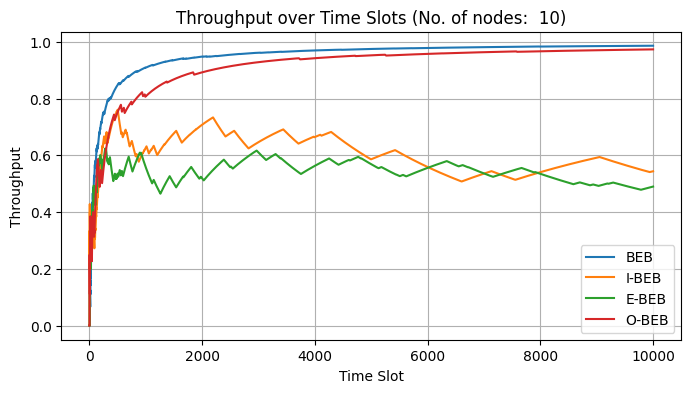

In [ ]:
#10 nodes
num_nodes = 10
num_slots = 10000

run_simulation_throughput_vs_timeslots(num_nodes, num_slots)

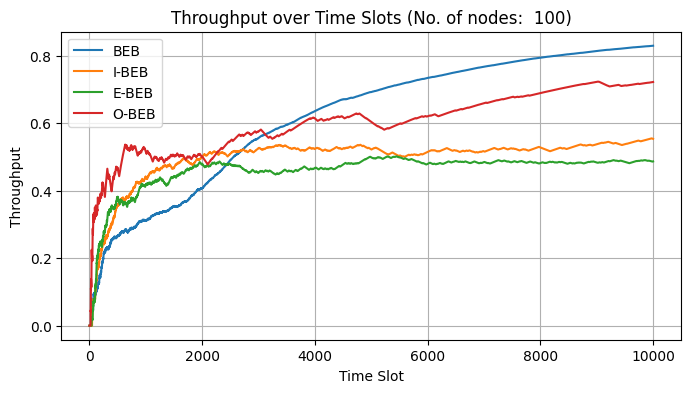

In [ ]:
#100 nodes
num_nodes = 100
num_slots = 10000

run_simulation_throughput_vs_timeslots(num_nodes, num_slots)

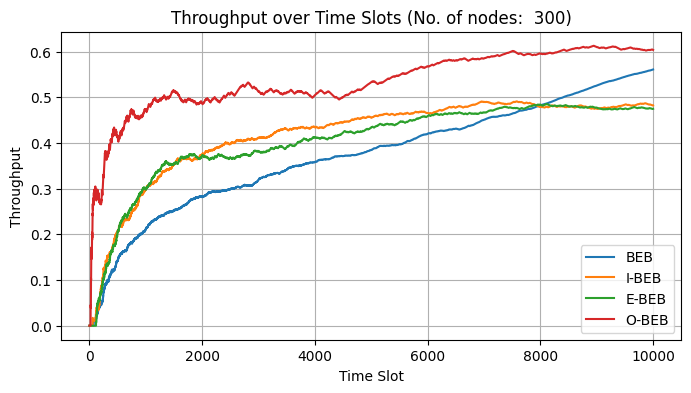

In [ ]:
#300 nodes
num_nodes = 300
num_slots = 10000

run_simulation_throughput_vs_timeslots(num_nodes, num_slots)

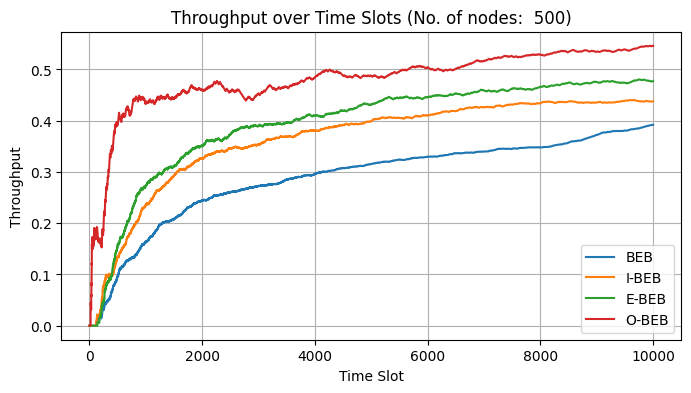

In [ ]:
#500 nodes
num_nodes = 500
num_slots = 10000

run_simulation_throughput_vs_timeslots(num_nodes, num_slots)

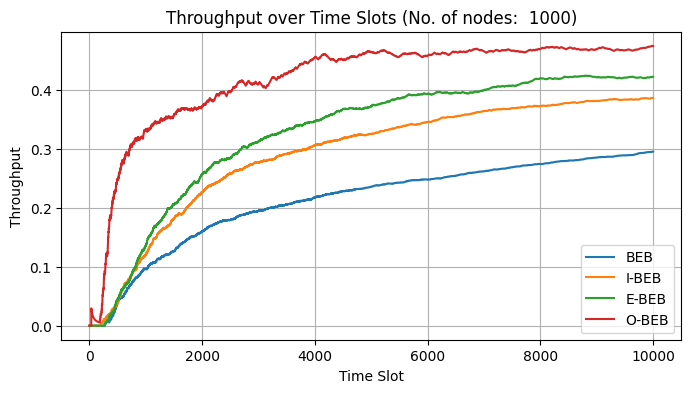

In [ ]:
#1000 nodes
num_nodes = 1000
num_slots = 10000

run_simulation_throughput_vs_timeslots(num_nodes, num_slots)

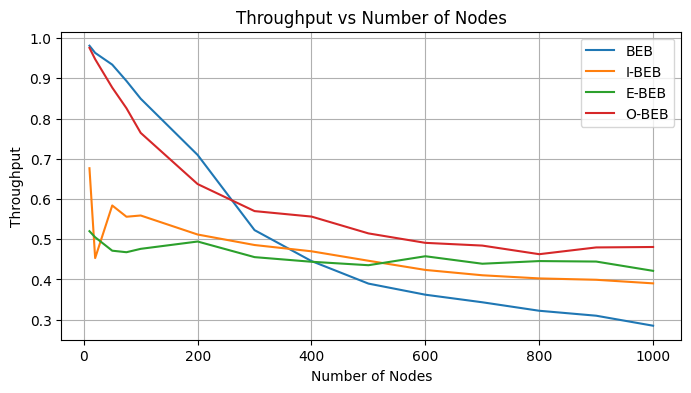

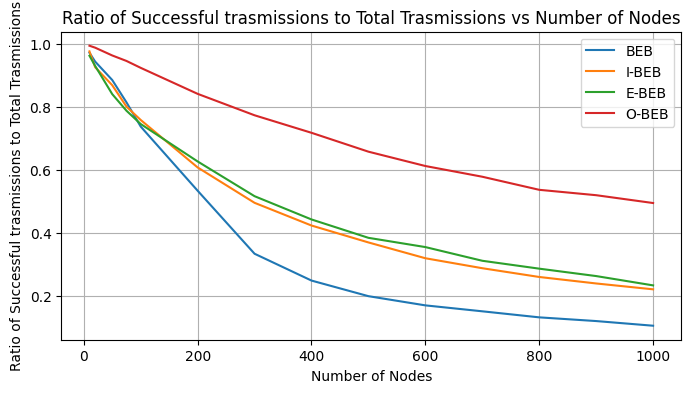

In [ ]:
#range of nodes
throughput_lastval_BEB = []
throughput_lastval_I_BEB = []
throughput_lastval_E_BEB = []
throughput_lastval_O_BEB = []

ratio_success_vs_total_BEB = []
ratio_success_vs_total_I_BEB = []
ratio_success_vs_total_E_BEB = []
ratio_success_vs_total_O_BEB = []

num_nodes = [10, 20, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# num_nodes = [5, 10, 20] + [*range(50, 1001, 50)]
num_slots = 10000

for i in num_nodes:
  throughput_BEB, total_transmissions_BEB, successful_transmissions_BEB = simulate_BEB(i, num_slots)
  throughput_lastval_BEB.append(throughput_BEB[-1])
  ratio_success_vs_total_BEB.append(successful_transmissions_BEB / total_transmissions_BEB)

  throughput_I_BEB, total_transmissions_I_BEB, successful_transmissions_I_BEB = simulate_I_BEB(i, num_slots)
  throughput_lastval_I_BEB.append(throughput_I_BEB[-1])
  ratio_success_vs_total_I_BEB.append(successful_transmissions_I_BEB / total_transmissions_I_BEB)

  throughput_E_BEB, total_transmissions_E_BEB, successful_transmissions_E_BEB = simulate_E_BEB(i, num_slots)
  throughput_lastval_E_BEB.append(throughput_E_BEB[-1])
  ratio_success_vs_total_E_BEB.append(successful_transmissions_E_BEB / total_transmissions_E_BEB)

  throughput_O_BEB, total_transmissions_O_BEB, successful_transmissions_O_BEB = simulate_O_BEB(i, num_slots)
  throughput_lastval_O_BEB.append(throughput_O_BEB[-1])
  ratio_success_vs_total_O_BEB.append(successful_transmissions_O_BEB / total_transmissions_O_BEB)

# Plot throughput
plt.figure(figsize=(8, 4))
plt.plot(num_nodes, throughput_lastval_BEB, label = 'BEB')
plt.plot(num_nodes, throughput_lastval_I_BEB, label = 'I-BEB')
plt.plot(num_nodes, throughput_lastval_E_BEB, label = 'E-BEB')
plt.plot(num_nodes, throughput_lastval_O_BEB, label = 'O-BEB')

plt.xlabel('Number of Nodes')
plt.ylabel('Throughput')
plt.legend()
plt.title('Throughput vs Number of Nodes')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(num_nodes, ratio_success_vs_total_BEB, label = 'BEB')
plt.plot(num_nodes, ratio_success_vs_total_I_BEB, label = 'I-BEB')
plt.plot(num_nodes, ratio_success_vs_total_E_BEB, label = 'E-BEB')
plt.plot(num_nodes, ratio_success_vs_total_O_BEB, label = 'O-BEB')

plt.xlabel('Number of Nodes')
plt.ylabel('Ratio of Successful trasmissions to Total Trasmissions')
plt.legend()
plt.title('Ratio of Successful trasmissions to Total Trasmissions vs Number of Nodes')
plt.grid(True)
plt.show()